In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append("../")
import folderparser as fp
import folderscraper as fs
import interfacemetrics as intm
from interfacePlots import *
from config import cfg
import logging

In [3]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [4]:
SERVERFOLDER = os.path.join(cfg.path.server, r'conicalNozzle')
EXPORTFOLDER = os.path.join(cfg.path.fig, 'conicalNozzle', 'plots')
TOPFOLDERS = [os.path.join(SERVERFOLDER, s) for s in ['orig', 'speed_sweep', 'diameter', 'k', 'newtonian']]

# Generating Files

In [125]:
fs.populate(os.path.join(TOPFOLDERS[0], 'cn0'))

INFO:root:Exported file //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\orig\cn0\legend.csv


[['folder', 'cn0'],
 ['compare to', '', ''],
 ['snappyHexMesh time', '492.92', 's'],
 ['snappyHexMesh time', '8.22', 'min'],
 ['interFoam time s', '132348.00', 's'],
 ['interFoam time hr', '36.76', 'hr'],
 ['simulation time', '2.5', 's'],
 ['simulation rate', '14.71', 'hr/s'],
 ['', ''],
 ['', ''],
 ['mesh', ''],
 ['GEOMETRY', ''],
 ['nozzle inner width', ' 0.603', 'mm'],
 ['nozzle thickness', ' 0.152', 'mm'],
 ['bath width', '9.668', 'mm'],
 ['bath depth', '4.241', 'mm'],
 ['nozzle length', '1.819', 'mm'],
 ['bath left coord', '-4.834', 'mm'],
 ['bath right coord', '4.834', 'mm'],
 ['bath front coord', '2.1205', 'mm'],
 ['bath back coord', '-2.1205', 'mm'],
 ['bath bottom coord', '-2.1205', 'mm'],
 ['bath top coord', '2.1205', 'mm'],
 ['nozzle bottom coord', '0.3015', 'mm'],
 ['nozzle center x coord', '-2.412', 'mm'],
 ['nozzle center y coord', '0.0', 'mm'],
 ['nozzle angle', ' 0', 'degrees'],
 ['horizontal', False, ''],
 ['bath velocity', '0.01', 'm/s'],
 ['ink velocity', '0.01', 'm/

In [26]:
fp.redoVTKSeriesNoLog(os.path.join(SERVERFOLDER, 'newtonian', 'cn220'))

1644872569.985941 1644872299.211087


In [284]:
import pandas as pd
o = []
for topfolder in TOPFOLDERS:
    for f in fp.caseFolders(topfolder):
        l = fp.legendUnique(f)
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
fn = os.path.join(cfg.path.fig, 'conicalNozzle', 'legend_general.csv')
p.to_csv(fn)
logging.info(f'Exported {fn}')

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\legend_general.csv


In [419]:
for topfolder in TOPFOLDERS:
    for folder in fp.caseFolders(topfolder):
        intm.sumAndSteady(folder, False)

INFO:root://cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\diameter\cn229
INFO:root:    Exported //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\diameter\cn229\steadyTimes.csv
INFO:root:    Exported //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\diameter\cn229\steadyPositions.csv
INFO:root://cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\k\cn213
INFO:root:    Exported //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\k\cn213\steadyTimes.csv
INFO:root:    Exported //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\k\cn213\steadyPositions.csv
INFO:root://cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNo

# Plots

### nozzle angle, bath size

In [298]:
time = 2.5
x = 5
labels = ['arean', 'vertdispn', 'aspectratio', 'speeddecay']
xvar = 'nozzle_angle'
yvar = 'bath_depth'
imsize=1
kwargs = {'overwrite':True, 'xvar':xvar, 'yvar':yvar}

# export plots
exportMeta = False
exportMetrics = False
exportXS = False
exportPics = True
exportSteady = False
exportStress = False
piclist = ['y_viscy', 'x_viscx', 'y_umag', 'y_shearStressy']

for TOPFOLDER in [TOPFOLDERS[0]]:
    if exportMeta:
        # metadata
        txtPlots0(TOPFOLDER, EXPORTFOLDER, **kwargs)
        timePlots(TOPFOLDER, EXPORTFOLDER, **kwargs)
        runtimePlots0(TOPFOLDER, EXPORTFOLDER, **kwargs)

    if exportMetrics:
        # metrics: aspect ratio, speed, area
        qualityPlots0(TOPFOLDER, EXPORTFOLDER, time, x, labels=labels, cvar=yvar, **kwargs)

    if exportXS:
        # cross-sections
        XSPlots0(TOPFOLDER, EXPORTFOLDER, time, x, **kwargs)

    if exportPics:
        # images
        for ta in piclist:
            picPlots0(TOPFOLDER, EXPORTFOLDER, time, 0, tag=ta, **kwargs)

    if exportSteady:
        # stability
        steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [0], **kwargs)

    if exportStress:
        # shear stress vs. position
        shearStressPlots0(TOPFOLDER, EXPORTFOLDER, time, cvar=xvar, bath_depth_list=[6.05], **kwargs)
        shearStressPlots0(TOPFOLDER, EXPORTFOLDER, time, cvar=xvar, bath_depth_list=[4.24, 4.35, 4.72, 5.12], **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_y_viscy_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_x_viscx_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_y_umag_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_y_shearStressy_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth


In [338]:
kwargs = {'overwrite':True, 'xvar':xvar, 'yvar':yvar}
qualityPlots0(TOPFOLDERS[0], EXPORTFOLDER, time, x, labels=['aspectratio', 'speeddecay'], cvar='', bath_depth_list=[6.05], **kwargs)
[picPlots0(TOPFOLDERS[0], EXPORTFOLDER, time, 0, tag=ta, bath_depth_list=[6.05], adjustBounds=False, **kwargs) for ta in ['y_shearStressy', 'y_viscy']]

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\trace_across_orig_bath_depth_list_[6.05]_volume_False_xvar_rbar


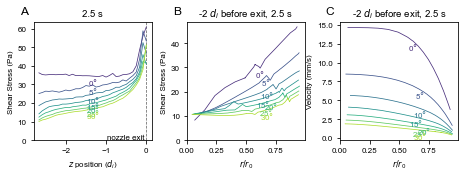

In [377]:
withinNozzle0(TOPFOLDERS[0], EXPORTFOLDER, 2.5, -2
              , zunits='nozzle_inner_width'
              , bath_depth_list=[6.05], overwrite=True
              , volume=False, xvar='rbar')

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\trace_across_orig_bath_depth_list_[6.05]_volume_True_xvar_rbar


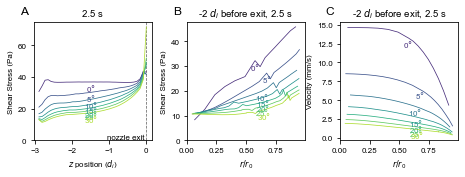

In [380]:
withinNozzle0(TOPFOLDERS[0], EXPORTFOLDER, 2.5, -2
              , zunits='nozzle_inner_width'
              , bath_depth_list=[6.05], overwrite=True
              , volume=True, xvar='rbar')

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\xs_8nozzle_inner_width_t_2.5_orig_bath_depth_list_[6.05]_cvar_nozzle_angle_xvar_nozzle_angle_yvar_bath_depth


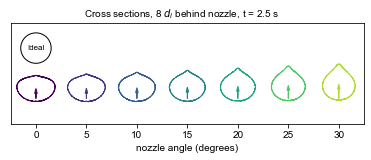

In [351]:
XSPlots0(TOPFOLDERS[0], EXPORTFOLDER, 2.5, 8, xunits='nozzle_inner_width', 
         bath_depth_list=[6.05], cvar='nozzle_angle', 
         xvar='nozzle_angle', yvar='bath_depth', overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\survivalMulti_orig_cvar_nozzle_angle_bath_depth_list_[6.05]_volume_True


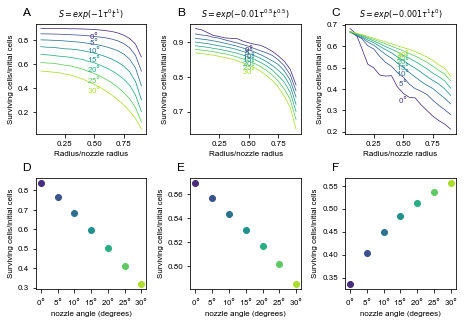

In [391]:
survivalRMultiRow(TOPFOLDERS[0], EXPORTFOLDER, 
                  cvar='nozzle_angle', bath_depth_list=[6.05]
                  , overwrite=True, volume=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\survivalMulti_orig_cvar_nozzle_angle_bath_depth_list_[6.05]_volume_False


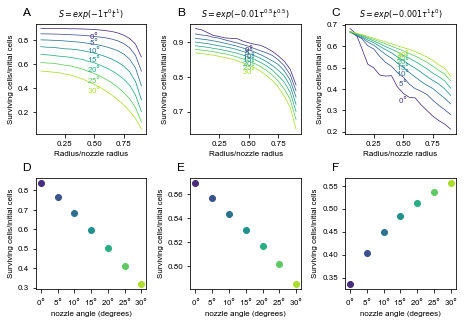

In [390]:
survivalRMultiRow(TOPFOLDERS[0], EXPORTFOLDER, 
                  cvar='nozzle_angle', bath_depth_list=[6.05]
                  , overwrite=True, volume=False)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\survival_t_cn137_0.01_0.5_0.5_nozzle_inner_width_orig_
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\survival_t_cn140_0.01_0.5_0.5_nozzle_inner_width_orig_


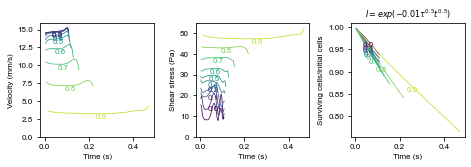

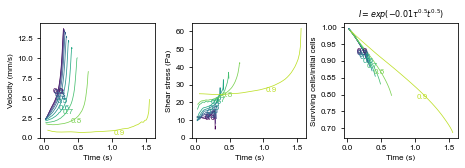

In [56]:
for s in [137, 140]:
    folder = os.path.join(SERVERFOLDER, 'orig', f'cn{s}')
    for d in [{'a':10**-2, 'b':0.5, 'c':0.5}]:
        survivalPlot(folder, EXPORTFOLDER, 't',  a=d['a'], b=d['b'], c=d['c'], dr=0.1, export=True, overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\line_2.5_['vz', 'vx', 'nu']_nozzle_angle_orig_x_1.4_bath_depth_list_[6.05]_nozzle_angle_list_[0, 10, 20, 30]


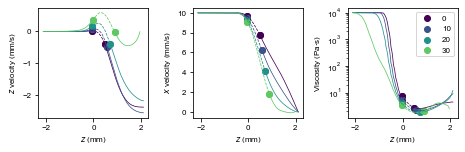

In [268]:
topfolder = os.path.join(SERVERFOLDER, 'orig')
linePlots0(topfolder, EXPORTFOLDER, 'nozzle_angle', 2.5, imsize=6.5, yvar=['vz', 'vx', 'nu'], 
           x=1.4, bath_depth_list=[6.05], nozzle_angle_list=[0,10,20,30], export=True, overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_a_stre_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth_bath_depth_list_[6.05]_nozzle_angle_list_[0, 10, 20, 30]


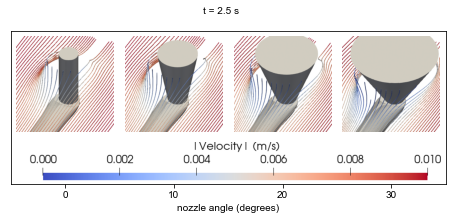

In [251]:
topfolder = os.path.join(SERVERFOLDER, 'orig')
picPlots0(topfolder, EXPORTFOLDER, 2.5, 0, tag='a_stre', overwrite=True, xvar='nozzle_angle', yvar='bath_depth'
          , bath_depth_list=[6.05], nozzle_angle_list=[0,10,20,30], imsize=8)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_y_umag_t0.7_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth_bath_depth_list_[6.05]_nozzle_angle_list_[0, 10, 20, 30]


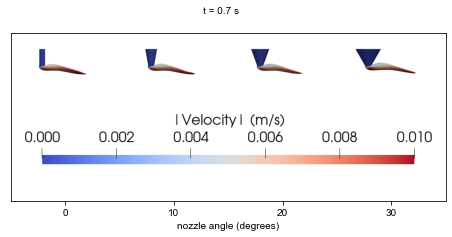

In [475]:
topfolder = os.path.join(SERVERFOLDER, 'orig')
picPlots0(topfolder, EXPORTFOLDER, 0.7, 0, tag='y_umag', overwrite=True,
          xvar='nozzle_angle', yvar='bath_depth', adjustBounds=True
          , bath_depth_list=[6.05], nozzle_angle_list=[0,10,20,30], imsize=8)

### speed

In [278]:
time = 2.5
x = 2
xvar = 'vsup'
yvar = 'nozzle_angle'
labels = ['arean', 'vertdispn', 'aspectratio', 'speeddecay']
kwargs = {'overwrite':True, 'xvar':xvar, 'yvar':yvar}

# export plots
exportMeta = False
exportMetrics = False
exportXS = False
exportPics = True
exportSteady = False
exportStress = False

for TOPFOLDER in [TOPFOLDERS[2]]:
    if exportMeta:
        # metadata
        txtPlots0(TOPFOLDER, EXPORTFOLDER, **kwargs)
        timePlots(TOPFOLDER, EXPORTFOLDER, **kwargs)
        runtimePlots0(TOPFOLDER, EXPORTFOLDER, **kwargs)

    if exportMetrics:
        # metrics: aspect ratio, speed, area
        qualityPlots0(TOPFOLDER, EXPORTFOLDER, time, x, labels=labels, cvar=yvar, **kwargs)

    if exportXS:
        # cross-sections
        XSPlots0(TOPFOLDER, EXPORTFOLDER, time, x,  **kwargs)

    if exportPics:
        # images
        for ta in ['y_viscy', 'x_viscx', 'y_umag']:
            picPlots0(TOPFOLDER, EXPORTFOLDER, t, 0, tag=ta, adjustBounds=False, **kwargs)

    if exportSteady:
        # stability
        steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [0], **kwargs)

    if exportStress:
        # shear stress vs. position
        shearStressPlots0(TOPFOLDER, EXPORTFOLDER, time, cvar=xvar, **kwargs)


INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\pics_y_viscy_t2.5_sigma_0_speed_sweep_xvar_vsup_yvar_nozzle_angle
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\pics_x_viscx_t2.5_sigma_0_speed_sweep_xvar_vsup_yvar_nozzle_angle
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\pics_y_umag_t2.5_sigma_0_speed_sweep_xvar_vsup_yvar_nozzle_angle


INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\trace_across_speed_sweep_xvar_rbar_volume_False_vsup_list_[5, 7.5, 10, 12.5, 15]_nozzle_angle_list_[0]


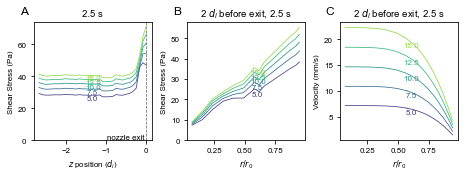

In [40]:
withinNozzle0(os.path.join(SERVERFOLDER, 'speed_sweep'), EXPORTFOLDER, 2.5, 2
              , zunits='nozzle_inner_width', 
              cvar='vsup', overwrite=True 
              , xvar='rbar', volume=False
              , vsup_list=[5, 7.5, 10, 12.5, 15]
             , nozzle_angle_list=[0])

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\xs_8nozzle_inner_width_t_2.5_speed_sweep_cvar_vsup_xvar_vsup_yvar_nozzle_angle_vsup_list_[5, 7.5, 10, 12.5, 15]


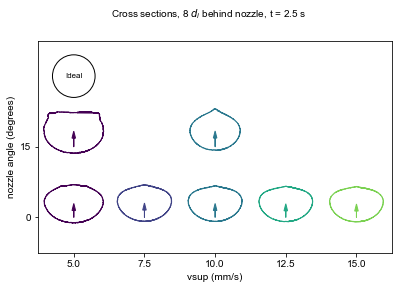

In [433]:
XSPlots0(os.path.join(SERVERFOLDER, 'speed_sweep'), EXPORTFOLDER, 2.5, 8
         , xunits='nozzle_inner_width', 
         cvar='vsup', xvar='vsup', yvar='nozzle_angle',
         vsup_list=[5, 7.5, 10, 12.5, 15], overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\survivalMulti_speed_sweep_cvar_vsup_volume_False_vsup_list_[5, 7.5, 10, 12.5, 15]_nozzle_angle_list_[0]


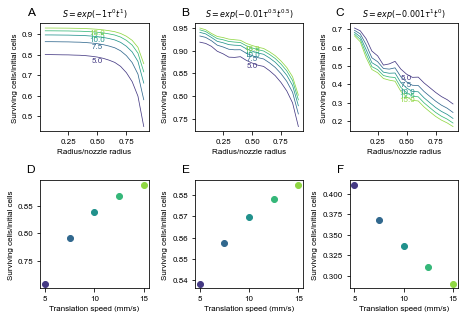

In [435]:
survivalRMultiRow(os.path.join(SERVERFOLDER, 'speed_sweep'), EXPORTFOLDER, cvar='vsup'
                  , volume=False
                  , vsup_list=[5, 7.5, 10, 12.5, 15]
                  , nozzle_angle_list=[0], overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\pics_y_umag_t1_sigma_0_speed_sweep_xvar_vsup_yvar_nozzle_angle


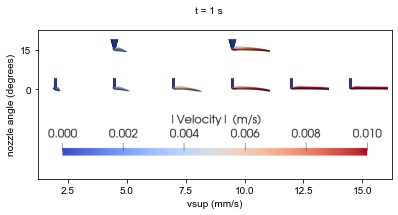

In [434]:
picPlots0(os.path.join(SERVERFOLDER, 'speed_sweep'), EXPORTFOLDER, 1, 0
          , tag='y_umag', overwrite=True, xvar='vsup', yvar='nozzle_angle')

### diameter

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\trace_across_diameter_xvar_rbar_volume_False_nozzle_angle_list_[0]
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\trace_across_diameter_xvar_rbar_volume_False_nozzle_angle_list_[15]


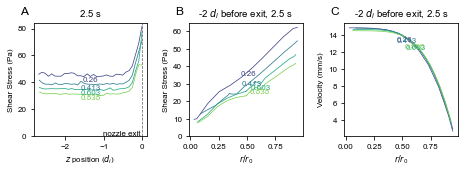

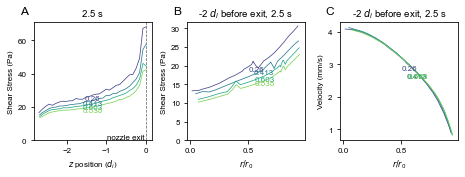

In [454]:
topfolder = os.path.join(SERVERFOLDER, 'diameter')
for na in [0, 15]:
    withinNozzle0(topfolder, EXPORTFOLDER, 2.5, -2
                  , zunits='nozzle_inner_width', cvar='nozzle_inner_width'
                  , xvar='rbar', volume=False
                  , nozzle_angle_list=[na], overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\xs_6nozzle_inner_width_t_2.5_diameter_cvar_nozzle_inner_width_xvar_nozzle_inner_width_yvar_nozzle_angle


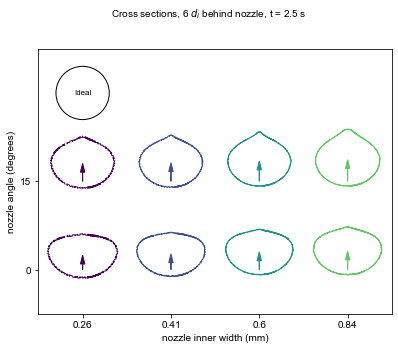

In [496]:
topfolder = os.path.join(SERVERFOLDER, 'diameter')
XSPlots0(topfolder, EXPORTFOLDER, 2.5, 6, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nozzle_inner_width'
         , yvar='nozzle_angle', overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\pics_y_umag_t2.5_sigma_0_diameter_xvar_nozzle_inner_width_yvar_nozzle_angle


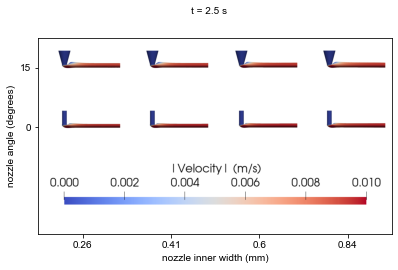

In [497]:
picPlots0(topfolder, EXPORTFOLDER, 2.5, 0, tag='y_umag', overwrite=True
          , xvar='nozzle_inner_width', yvar='nozzle_angle')

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\survivalMulti_diameter_cvar_nozzle_inner_width_nozzle_angle_list_[0]_volume_False


ZeroDivisionError: division by zero

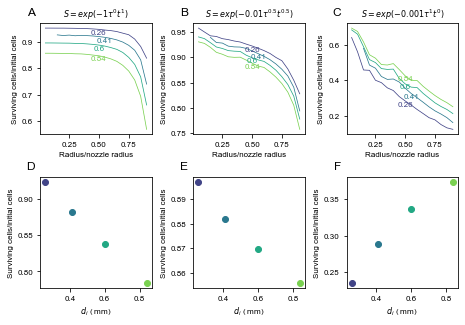

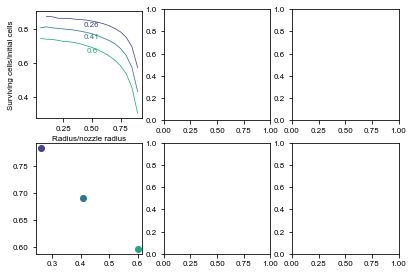

In [476]:
topfolder = os.path.join(SERVERFOLDER, 'diameter')
for na in [0,15]:
    survivalRMultiRow(topfolder, EXPORTFOLDER, cvar='nozzle_inner_width'
                  , nozzle_angle_list=[na], volume=False, overwrite=True, export=True)

## newtonian

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newtonian\xs_8nozzle_inner_width_t_2.5_newtonian_cvar_nozzle_angle_xvar_nozzle_angle_yvar_nuink_dy_0.7


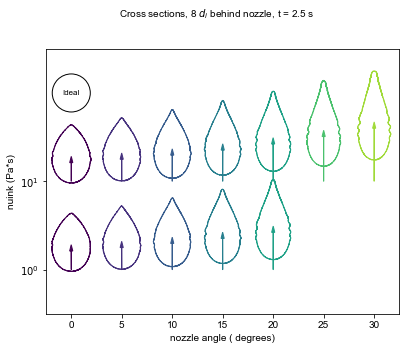

In [37]:
topfolder = os.path.join(SERVERFOLDER, 'newtonian')
XSPlots0(topfolder, EXPORTFOLDER, 2.5 , 8, xunits='nozzle_inner_width'
         , cvar='nozzle_angle', xvar='nozzle_angle', yvar='nuink', overwrite=True
        , dy=0.7, dx=0.4)

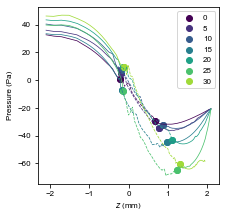

In [39]:
topfolder = os.path.join(SERVERFOLDER, 'newtonian')
linePlots0(topfolder, EXPORTFOLDER, 'nozzle_angle', 2.5, 3.25, yvar='p'
           , x=1.4, nuink_list=[10], export=False)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newtonian\trace_across_newtonian_xvar_rbar_volume_False_nuink_list_[1]
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newtonian\trace_across_newtonian_xvar_rbar_volume_False_nuink_list_[10]


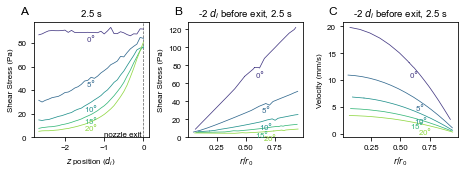

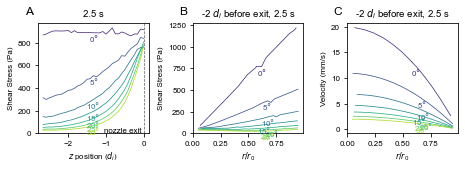

In [41]:
topfolder = os.path.join(SERVERFOLDER, 'newtonian')
for nuink in [1, 10]:
    withinNozzle0(topfolder, EXPORTFOLDER, 2.5, -2
                  , zunits='nozzle_inner_width', cvar='nozzle_angle'
                  , xvar='rbar', volume=False, export=True
                  , nuink_list=[nuink], overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newtonian\survivalMulti_newtonian_cvar_nozzle_angle_a3_0.0001_nuink_list_[1]_volume_False
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newtonian\survivalMulti_newtonian_cvar_nozzle_angle_a3_0.0001_nuink_list_[10]_volume_False


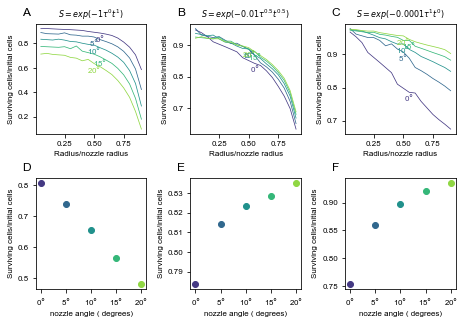

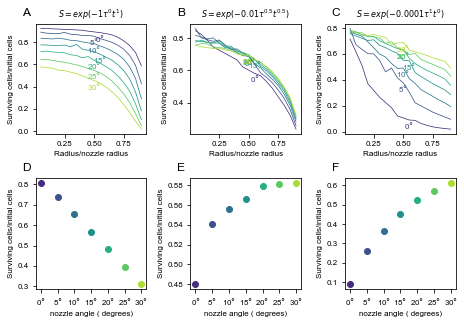

In [509]:
topfolder = os.path.join(SERVERFOLDER, 'newtonian')
for nuink in [1, 10]:
    survivalRMultiRow(topfolder, EXPORTFOLDER, cvar='nozzle_angle', a3=10**-4, fontsize=8
                  , nuink_list=[nuink], volume=False, overwrite=True, export=True)

In [271]:
kwargs = {'xvar':'nozzle_angle'
          , 'nozzle_angle_list':[0,10,20,30], 'export':True, 'overwrite':True}

for s in ['newtonian', 'orig']:
    topfolder = os.path.join(SERVERFOLDER, s)
    if s=='newtonian':
        kwargs['nuink_list']=[10]
    else:
        kwargs.pop('nuink_list')
        kwargs['bath_depth_list'] = [6.05]
    linePlots0(topfolder, EXPORTFOLDER, 'nozzle_angle', 2.5, imsize=6.5
           , yvar=['vz', 'vx', 'nu'], x=1.4, **kwargs)
    picPlots0(topfolder, EXPORTFOLDER, 2.5, 0, tag='a_stre', imsize=8, yvar='ink_rho',
               **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newtonian\line_2.5_['vz', 'vx', 'nu']_nozzle_angle_newtonian_x_1.4_xvar_nozzle_angle_nozzle_angle_list_[0, 10, 20, 30]_nuink_list_[10]
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\newtonian\pics_a_stre_t2.5_sigma_0_newtonian_yvar_ink_rho_xvar_nozzle_angle_nozzle_angle_list_[0, 10, 20, 30]_export_True_nuink_list_[10]
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\line_2.5_['vz', 'vx', 'nu']_nozzle_angle_orig_x_1.4_xvar_nozzle_angle_nozzle_angle_list_[0, 10, 20, 30]_bath_depth_list_[6.05]
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_a_stre_t2.5_sigma_0_orig_yvar_ink_rho_xvar_nozzle_angle_nozzle_angle_list_[0, 10, 20, 30]_export_True_bath_depth_list_[6.05]


## viscosity (k)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\xs_8nozzle_inner_width_t_2.5_k_xvar_kink_cvar_kink_yvar_nozzle_angle_export_True


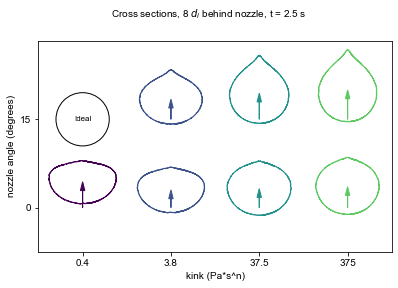

In [524]:
topfolder = os.path.join(SERVERFOLDER, 'k')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'kink', 
          'cvar':'kink', 'yvar':'nozzle_angle',
         'overwrite':True, 'export':True}

XSPlots0(topfolder, EXPORTFOLDER, 2.5 , 8, dx=0.5, **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\pics_y_shearStressy_t2.5_sigma_0_k_xunits_nozzle_inner_width_xvar_kink_cvar_kink_yvar_nozzle_angle_export_True


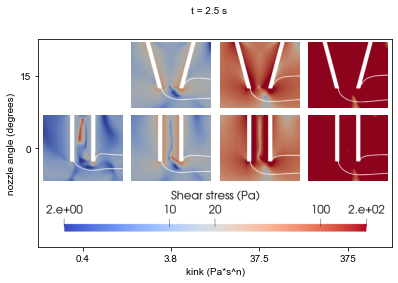

In [63]:
topfolder = os.path.join(SERVERFOLDER, 'k')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'kink', 
          'cvar':'kink', 'yvar':'nozzle_angle',
         'overwrite':True, 'export':True}

picPlots0(topfolder, EXPORTFOLDER, 2.5,0, 'y_shearStressy'
          , crops={'cropxl':200/1200, 'cropxr':500/1200, 'cropyt':400/1216, 'cropyb':650/1216}
          , **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\names_k_xunits_nozzle_inner_width_xvar_kink_cvar_kink_yvar_nozzle_angle_export_True


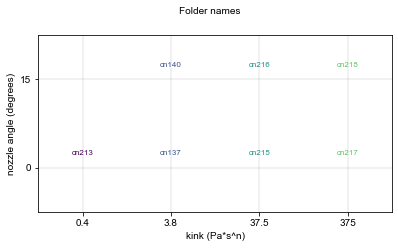

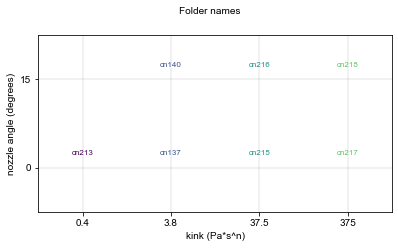

In [520]:
topfolder = os.path.join(SERVERFOLDER, 'k')
kwargs = {'xunits':'nozzle_inner_width', 'xvar':'kink', 
          'cvar':'kink', 'yvar':'nozzle_angle',
         'overwrite':True, 'export':True}

txtPlots0(topfolder, EXPORTFOLDER,  **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\trace_across_k_nozzle_angle_list_[0]_xvar_rbar_volume_False_logy_True
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\trace_across_k_nozzle_angle_list_[15]_xvar_rbar_volume_False_logy_True


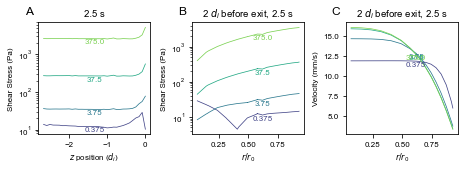

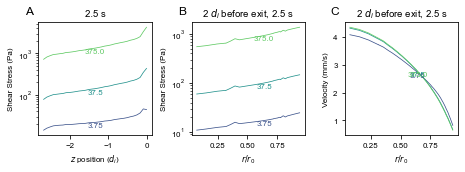

In [33]:
topfolder = os.path.join(SERVERFOLDER, 'k')
kwargs = {'zunits':'nozzle_inner_width', 'cvar':'kink', 'xvar':'rbar', 
         'overwrite':True, 'export':True, 'volume':False, 'logy':True}
for nozzle_angle in [0,15]:
    withinNozzle0(topfolder, EXPORTFOLDER, 2.5, 2, nozzle_angle_list=[nozzle_angle], **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\survivalMulti_k_nozzle_angle_list_[0]_zunits_nozzle_inner_width_cvar_kink_volume_False_logx_True_a3_0.0001
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\k\survivalMulti_k_nozzle_angle_list_[15]_zunits_nozzle_inner_width_cvar_kink_volume_False_logx_True_a3_0.0001


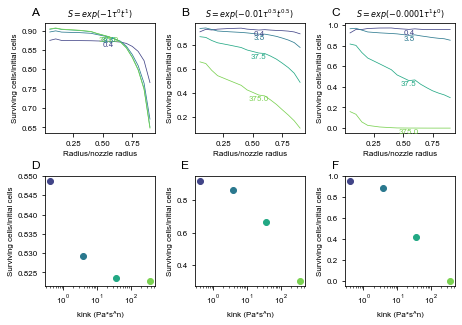

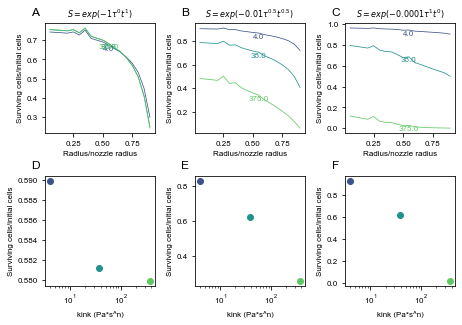

In [7]:
topfolder = os.path.join(SERVERFOLDER, 'k')
kwargs = {'zunits':'nozzle_inner_width', 'cvar':'kink',
         'overwrite':True, 'export':True, 'volume':False, 'logx':True, 'a3':10**-4}
for nozzle_angle in [0,15]:
    survivalRMultiRow(topfolder, EXPORTFOLDER, nozzle_angle_list=[nozzle_angle], **kwargs)